# Prediksi Kecepatan Angin Maksimum di Tanjungpinang Tahun 2022 dengan ARIMA

Notebook ini dibuat untuk proyek akhir Pembelajaran Mesin. Topik dari proyek ini adalah memprediksi kecepatan angin maksimum di Tanjungpinang tahun 2022 dengan model ARIMA.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_predict, plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Fungsi Utilitas

In [3]:
# Referensi kode: https://phdinds-aim.github.io/time_series_handbook/01_AutoRegressiveIntegratedMovingAverage/01_AutoRegressiveIntegratedMovingAverage.html
def evaluasi_model_arima(dataset, paramater_arima, ratio_latih=0.8):
    batas_latih = int(ratio_latih * len(dataset))
    dataset_latih = dataset[:batas_latih]
    dataset_validasi = dataset[batas_latih:]

    prediksi = pd.Series([])
    riwayat = dataset_latih.copy()

    for t in range(len(dataset_validasi)):
            diff = riwayat
            if paramater_arima[1] > 0:
                  for _ in range(paramater_arima[1]):
                    diff = riwayat.diff().fillna(0)

            model = ARIMA(diff, order=paramater_arima, enforce_stationarity=False)
            model_fit = model.fit()
            
            yhat = model_fit.forecast()
            yhat = yhat + riwayat.values[-1]
            prediksi = pd.concat([prediksi, yhat])
            riwayat = pd.concat([riwayat, pd.Series([dataset_validasi.values[t]])],
                                ignore_index='True')
    
    mse = mean_squared_error(dataset_validasi, prediksi)
    return mse

## Pengertian ARIMA

## Pengujian Model dengan Data Dummy

### Buka Dataset Dummy

In [4]:
# Membuat data dummy
data_dummy = pd.read_csv('./kecepatan_angin_dummy.csv')
data_dummy.head()

,kecepatan_angin
0,7
1,8
2,14
3,5
4,14


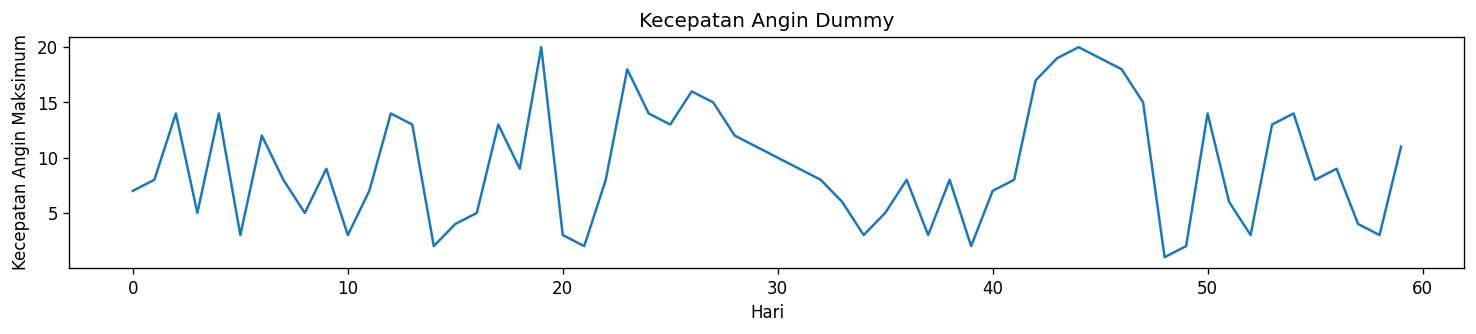

In [5]:
dummy_kec_angin = data_dummy['kecepatan_angin']

# Plot dataset dummy
plt.rcParams.update({'figure.figsize':(15,2.5), 'figure.dpi':120})
fig, ax = plt.subplots()
plt.plot(dummy_kec_angin)

ax.set_xlabel('Hari')
ax.set_ylabel('Kecepatan Angin Maksimum')
ax.set_title('Kecepatan Angin Dummy')

plt.show()

### Uji Statisioner Data Dummy

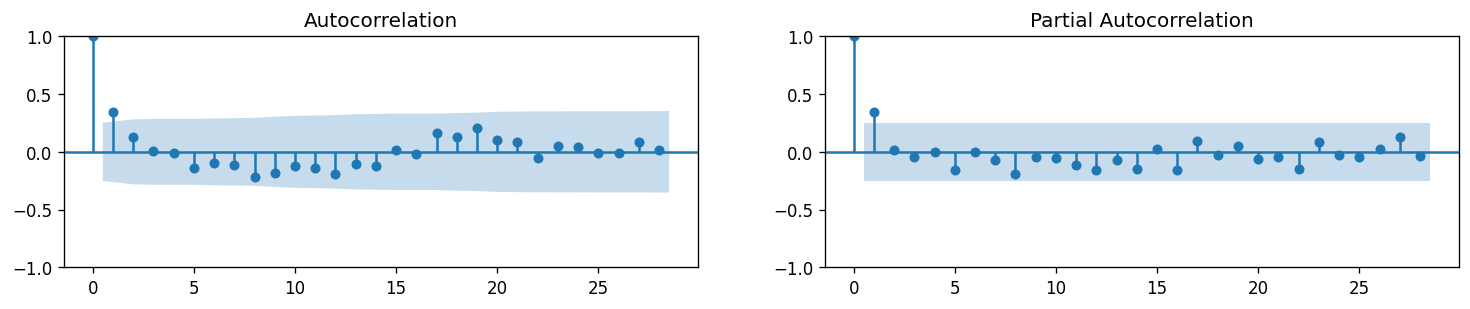

In [6]:
plt.rcParams.update({'figure.figsize':(15,2.5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)

plot_acf(dummy_kec_angin, ax=axes[0], lags=28)
plot_pacf(dummy_kec_angin, ax=axes[1], lags=28)

plt.show()

### Mencari Paramater ARIMA Terbaik

In [11]:
# Cari paramater terbaik untuk data dummy
p_max = 5
d_max = 2
q_max = 5

mse_terendah = float('inf')
paramater_terbaik = None

for p in range(p_max + 1):
    for d in range(d_max + 1):
        for q in range(q_max + 1):
            paramater = (p, d, q)
            try:
                mse = evaluasi_model_arima(dummy_kec_angin, paramater)
                if mse < mse_terendah:
                    mse_terendah = mse
                    paramater_terbaik = paramater
                print(f'ARIMA{paramater} MSE: {mse}')
            except:
                continue

print(f'Paramater terbaik: {paramater_terbaik}')

ARIMA(0, 0, 0) MSE: 152.83595901851535
ARIMA(0, 0, 1) MSE: 158.88130401450698
ARIMA(0, 0, 2) MSE: 170.72691412292977
ARIMA(0, 0, 3) MSE: 177.02146902457193
ARIMA(0, 0, 4) MSE: 173.20706420641844
ARIMA(0, 0, 5) MSE: 199.60163392185862
ARIMA(0, 1, 0) MSE: 114.41666666666667
ARIMA(0, 1, 1) MSE: 54.66028263424413
ARIMA(0, 1, 2) MSE: 51.73758299266009
ARIMA(0, 1, 3) MSE: 51.68542367381405
ARIMA(0, 1, 4) MSE: 46.102535982077235
ARIMA(0, 1, 5) MSE: 67.25040873836365
ARIMA(0, 2, 0) MSE: 283.4166666666667
ARIMA(0, 2, 1) MSE: 116.6012316501936
ARIMA(0, 2, 2) MSE: 64.67496987561101
ARIMA(0, 2, 3) MSE: 54.23370908208596
ARIMA(0, 2, 4) MSE: 54.09353744761302
ARIMA(0, 2, 5) MSE: 66.69148210237663
ARIMA(1, 0, 0) MSE: 165.5260990775589
ARIMA(1, 0, 1) MSE: 170.17151784686422
ARIMA(1, 0, 2) MSE: 169.71234720485933
ARIMA(1, 0, 3) MSE: 169.16307542176773
ARIMA(1, 0, 4) MSE: 186.1511482307526
ARIMA(1, 0, 5) MSE: 153.72054653228005
ARIMA(1, 1, 0) MSE: 123.48304995534914
ARIMA(1, 1, 1) MSE: 58.20706404565025

In [13]:
# Membuat model ARIMA dari dataset dummy
model = ARIMA(dummy_kec_angin, order=paramater_terbaik)
model_fit = model.fit()

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        kecepatan_angin   No. Observations:                   60
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -179.312
Date:                Fri, 07 Jul 2023   AIC                            374.623
Time:                        12:50:23   BIC                            391.243
Sample:                             0   HQIC                           381.111
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7823      0.663     -1.179      0.238      -2.083       0.518
ar.L2         -0.2284      0.652     -0.350      0.726      -1.507       1.050
ar.L3          0.3722      0.436      0.853      0.394      -0.483       1.227
ma.L1          0.1964      6.755      0.029      0.977     -13.043      13.436
ma.L2         -0.4566      7.893     -0.058      0.954     -15.928      15.014
ma.L3         -0.9164      4.927     -0.186      0.852     -10.573       8.740
ma.L4          0.1780      1.559      0.114      0.909      -2.877       3.233
sigma2        23.3183    155.045      0.150      0.880    -280.564     327.200
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.90   Prob(JB):                         0.51
Heteroskedasticity (H):               0.99   Skew:                            -0.12
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

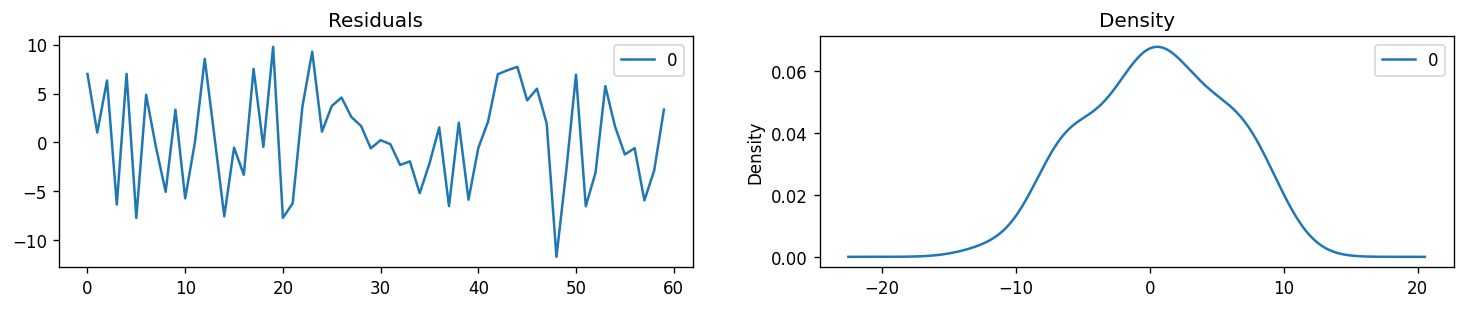

In [14]:
# Plot galat residual
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15,2.5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

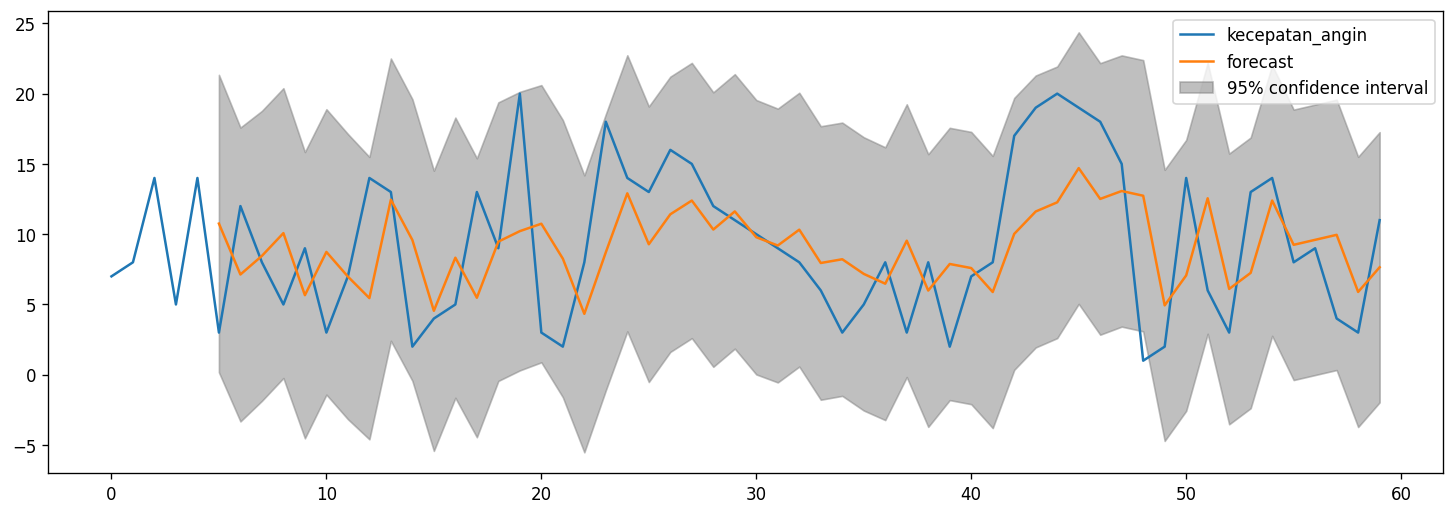

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
ax = dummy_kec_angin.plot(ax=ax)
fig = plot_predict(model_fit, start=5, dynamic=False, ax=ax, plot_insample=False)
plt.show()

In [18]:
print(mean_squared_error(model_fit.predict(), dummy_kec_angin))

25.972215510038886


### Validasi Model ARIMA

In [19]:
print(evaluasi_model_arima(dummy_kec_angin, paramater_terbaik))

42.25824141701347


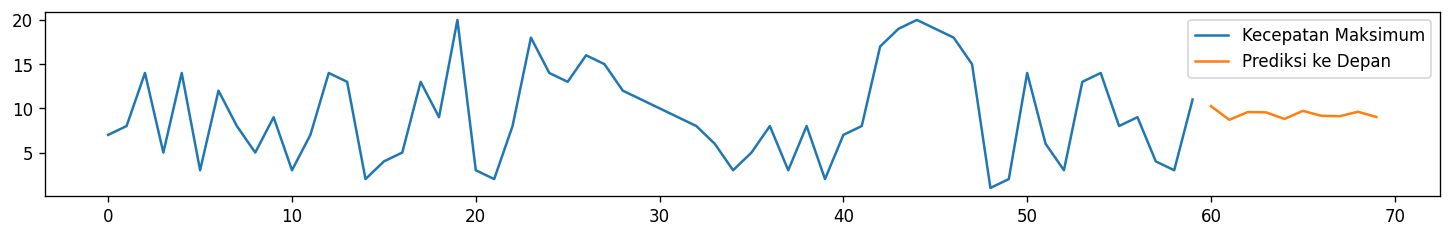

In [32]:
prediksi = model_fit.forecast(steps=10)

fig, ax = plt.subplots(figsize=(15,2))
dummy_kec_angin.plot(ax=ax, label="Kecepatan Maksimum")
prediksi.plot(ax=ax, label="Prediksi ke Depan")
plt.legend()
plt.show()

## Pengujian Model dengan Data Nyata

### Buka Dataset

In [41]:
# Buka dataset
df_kecepatan_angin = pd.read_csv('./kecepatan_angin_tpi_2022.csv',
                                 delimiter=';'
                                )
df_kecepatan_angin

,tanggal,kecepatan_maksimum
0,01/01/2022,4
1,02/01/2022,3
2,03/01/2022,3
3,04/01/2022,6
4,05/01/2022,7
...,...,...
361,28/12/2022,6
362,29/12/2022,8
363,30/12/2022,10
364,31/12/2022,13


In [42]:
df_kecepatan_angin['kecepatan_maksimum'].describe()

count    366.000000
mean       5.838798
std        1.854642
min        3.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       15.000000
Name: kecepatan_maksimum, dtype: float64

In [36]:
# Konversi tipe data kolom tanggal menjadi tipe data datetime
df_kecepatan_angin['tanggal'] = pd.to_datetime(df_kecepatan_angin['tanggal'], dayfirst=True)

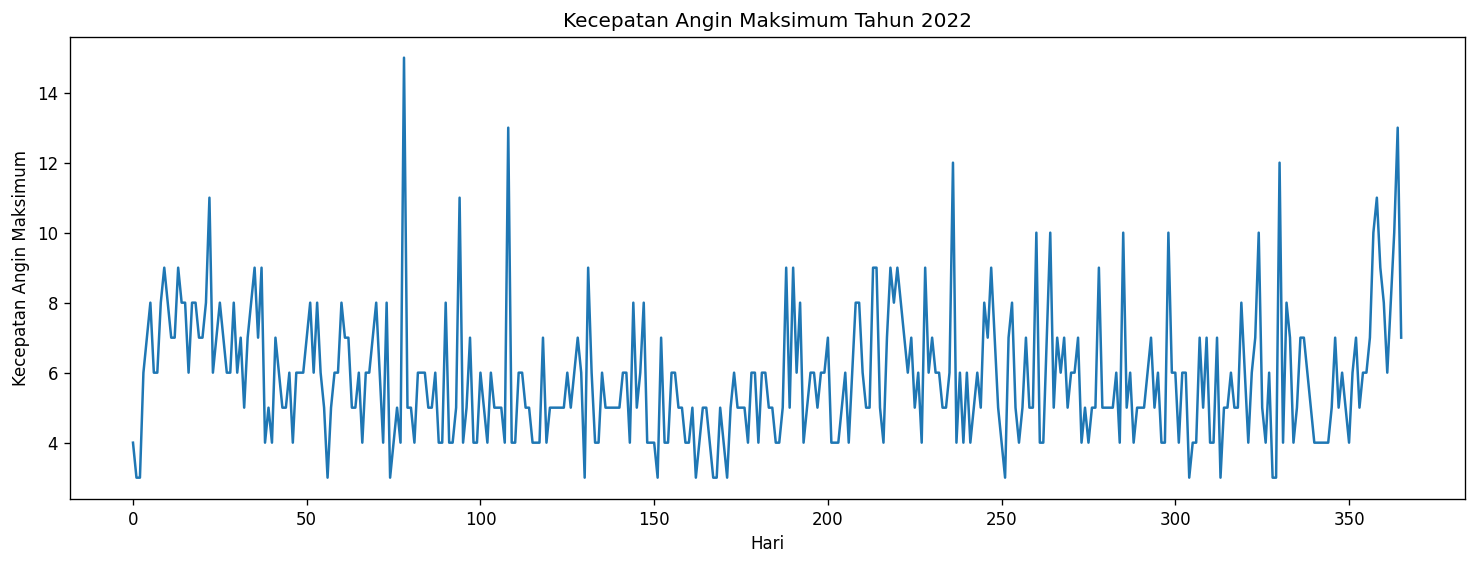

In [37]:
kecepatan_angin = df_kecepatan_angin['kecepatan_maksimum']

# Plot dataset
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(kecepatan_angin)

ax.set_xlabel('Hari')
ax.set_ylabel('Kecepatan Angin Maksimum')
ax.set_title('Kecepatan Angin Maksimum Tahun 2022')

plt.show()

### Uji Statisioner Data

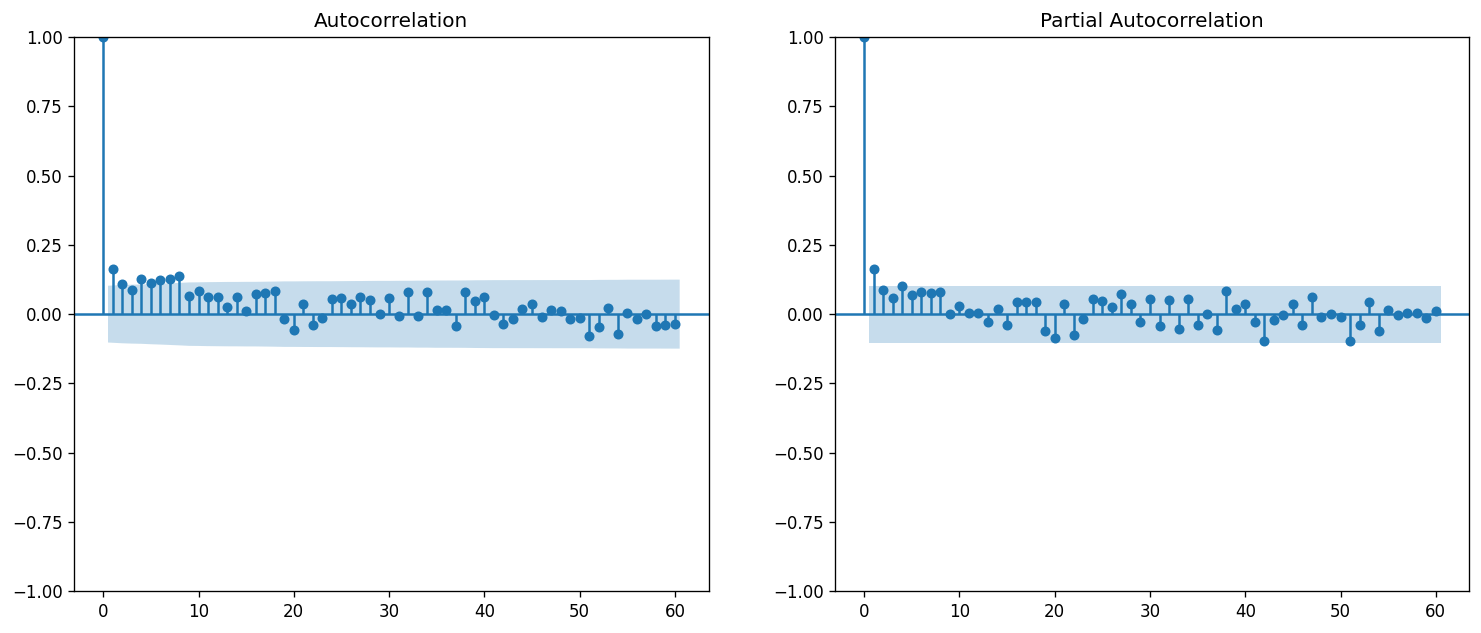

In [40]:
# Plot nilai ACF dan PACF dataset
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plot_acf(kecepatan_angin, ax=ax[0], lags=60)
plot_pacf(kecepatan_angin, ax=ax[1], lags=60)

plt.show()

Berdasarkan grafik tersebut, karena data tersebut menunjukkan penurunan secara lamban, maka data kecepatan angin maksimum perlu di-_differencing_ (menghitung selisih antardata).

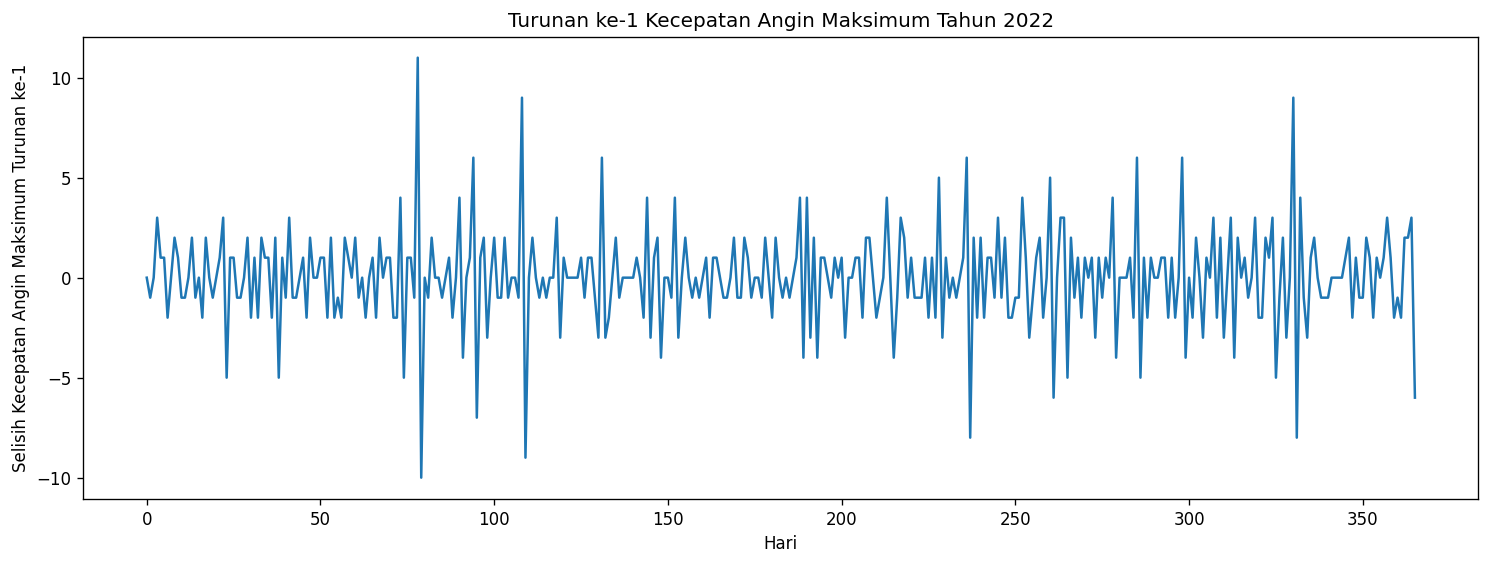

In [43]:
kecepatan_angin_orde_1 = kecepatan_angin.diff().fillna(0)

# Plot dataset turunan ke-1
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(kecepatan_angin_orde_1)

ax.set_xlabel('Hari')
ax.set_ylabel('Selisih Kecepatan Angin Maksimum Turunan ke-1')
ax.set_title('Turunan ke-1 Kecepatan Angin Maksimum Tahun 2022')

plt.show()

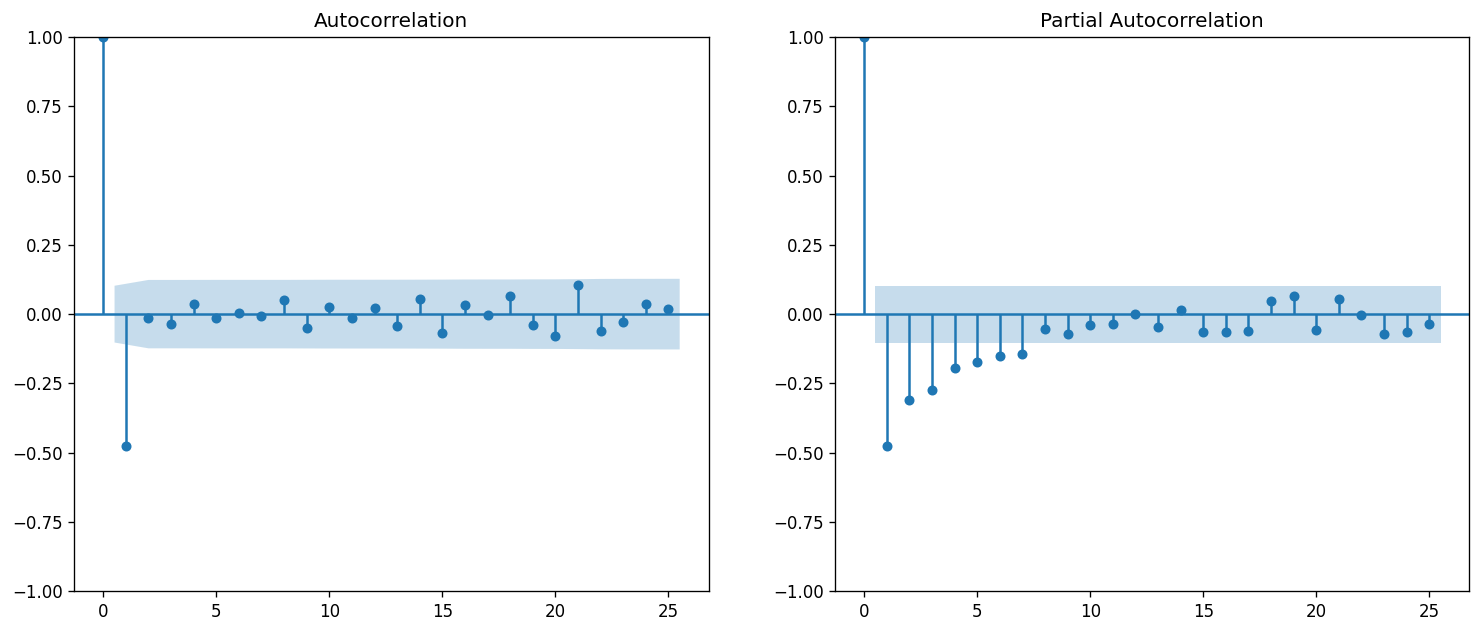

In [44]:
# Plot nilai ACF dan PACF dari turunan ke-1
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plot_acf(kecepatan_angin_orde_1, ax=ax[0], lags=25)
plot_pacf(kecepatan_angin_orde_1, ax=ax[1], lags=25)

plt.show()

### Melatih Model ARIMA

In [ ]:
# Menentukan paramater terbaik untuk dataset
p_max = 5
d_max = 2
q_max = 5

mse_terendah = float('inf')
paramater_terbaik = None

for p in range(p_max + 1):
    for d in range(d_max + 1):
        for q in range(q_max + 1):
            paramater = (p, d, q)
            try:
                mse = evaluasi_model_arima(kecepatan_angin, paramater)
                if mse < mse_terendah:
                    mse_terendah = mse
                    paramater_terbaik = paramater
                print(f'ARIMA{paramater} MSE: {mse}')
            except:
                continue

print(f'Paramater terbaik: {paramater_terbaik}')

In [ ]:
# Not Yet
#model = ARIMA(kecepatan_angin, order=(2, 2, 1))
#model_fit = model.fit()

In [ ]:
# Plot residual errors
#residuals = pd.DataFrame(model_fit.resid)
#fig, ax = plt.subplots(1,2, figsize=(15,2.5))
#residuals.plot(title="Residuals", ax=ax[0])
#residuals.plot(kind='kde', title='Density', ax=ax[1])
#plt.show()

In [ ]:
# Actual vs Fitted
#fig, ax = plt.subplots(figsize=(15,2))
#ax = kecepatan_angin.plot(ax=ax)
#fig = plot_predict(model_fit, start=6, dynamic=False, ax=ax, plot_insample=False)
#plt.show()

In [ ]:
#model = ARIMA(kecepatan_angin, order=(0, 0, 0))
#model_fitted = model.fit()
#ce = model_fit.predict(start=15, end=365)
#print(ce)

### Validasi Model ARIMA

In [ ]:
#print('=== MAE ===')

#for p in range(4):
#    for d in range(2):
#        for q in range(4):
#            olah_kecepatan_angin = kecepatan_angin
#            if d > 0:
#                for _ in range(d):
#                    olah_kecepatan_angin = olah_kecepatan_angin.diff().fillna(0)
#
#            model = ARIMA(olah_kecepatan_angin, order=(p, d, q))
#            model_fitted = model.fit()
#            mae = mean_absolute_error(model_fit.predict(start=5, end=365), olah_kecepatan_angin[5:])
#            print(f'ARIMA({p}, {d}, {q}): {mae}')